### Option Volume to SPY comparision

In this note it tries to see if there is a correlitation between daily options volume to the movement in SPY. It fetches the daily data for a

In [1]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import urllib.request as request
import json
from datetime import datetime
from matplotlib.dates import MonthLocator, YearLocator, DayLocator
import seaborn as sns

##### Plot styles

In [2]:
sns.set_theme(palette="pastel")
plt.rcParams["figure.figsize"] = (20,10)

##### The timeframe for the analysis

In [7]:
startDate = "2022-09-01"
endDate = "2022-09-13"

##### Fetch SPY data.

In [8]:
spy = yf.download("SPY", start=startDate, end=endDate)
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,392.890015,396.779999,390.040009,396.420013,396.420013,78740100
2022-09-02,400.279999,401.559998,390.329987,392.239990,392.239990,99574100
2022-09-06,393.130005,394.119995,388.420013,390.760010,390.760010,76637400
2022-09-07,390.429993,398.589996,390.200012,397.779999,397.779999,70964200
2022-09-08,395.390015,400.859985,394.119995,400.380005,400.380005,80821700
2022-09-09,402.739990,407.510010,402.459991,406.600006,406.600006,76618100
2022-09-12,408.779999,411.730011,408.459991,410.970001,410.970001,69122500


##### Fetches the daily options volue for OCC website for the selected month.

In [5]:
url = f'https://marketdata.theocc.com/mdapi/historical-volume?report_type=VS&report_time=D&report_date={endDate}'

response = request.urlopen(url)
data = json.loads(response.read())

#Parse the daily options volume data
daily_volume_data = []

for row in data["entity"]["dailyVolumeDataList"]:
    daily_volume_data.append({
        "Date": datetime.fromtimestamp(row["activityDate"] / 1000), #Convert date from milisecond to seconds.
        "OCCTotal": row["occTotal"]
    })
    
daily_options_volume = pd.DataFrame(daily_volume_data)
daily_options_volume.sort_index(ascending=False, inplace=True)
daily_options_volume.set_index("Date", inplace=True)

daily_options_volume

,OCCTotal
Date,
2022-09-01,43947189
2022-09-02,45432682
2022-09-06,37901540
2022-09-07,39843262
2022-09-08,39026928
2022-09-09,45298382
2022-09-12,39599937


##### Plot both options and spy together for analysis

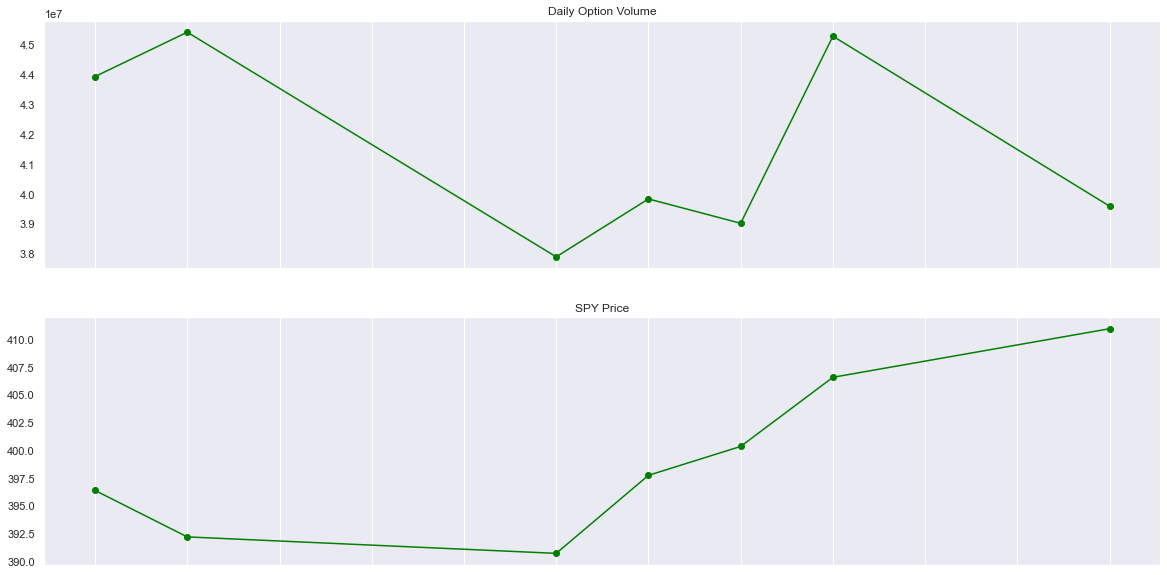

In [9]:
figure, axis = plt.subplots(2, 1)

dloc = DayLocator()

# Option daily volume plot
oax = axis[0]
oax.set_title("Daily Option Volume")
oax.plot(daily_options_volume.index, daily_options_volume["OCCTotal"], marker = 'o', color='green')
oax.xaxis.set_major_locator(dloc)
oax.grid(which='major', axis='y')
oax.set_xticklabels("")


# SPY plot
sax = axis[1]
sax.set_title("SPY Price")
sax.plot(spy.index, spy["Close"], marker = 'o', color='green')
sax.xaxis.set_major_locator(dloc)
sax.grid(which='major', axis='y')
sax.set_xticklabels("")

plt.show()